In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString
import matplotlib

In [2]:
US = gpd.read_file('Data 2/Data/us_states_simple/us_states_simple.shp')

In [3]:
Texas = US[US['state_name']=='Texas'].reset_index(drop=True)
Texas.plot()

In [4]:
transmission_lines = gpd.read_file('Data 2/Data/Electric_Power_Transmission_Lines.shp')

In [5]:
Location = gpd.read_file('Data 2/Data/Average_Solar.shp')
geometry = [Point(xy) for xy in zip(Location.Lon, Location.Lat)]
Location = GeoDataFrame(Location, geometry=geometry)


In [6]:
locs = Location[Location['Day']==1]
locs.crs = {'init': 'epsg:4326'}
locs.crs, Texas.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'})

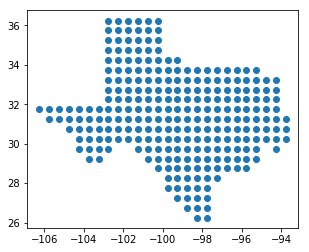

In [7]:
Final = gpd.sjoin(Texas, locs, how="left", op='intersects').reset_index(drop=True)
geometry2 = [Point(xy) for xy in zip(Final.Lon, Final.Lat)]
Final2 = GeoDataFrame(Final, geometry=geometry2)
Final2.plot()

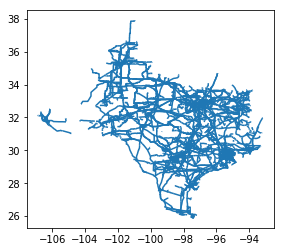

In [8]:
Texas_tl = gpd.sjoin(transmission_lines, Texas, how="inner", op='intersects').reset_index(drop=True)
Texas_tl.plot()

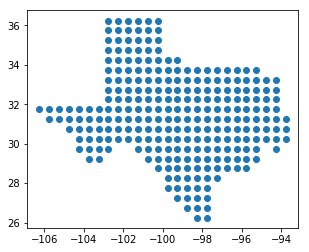

In [9]:
Final2.crs = {'init': 'epsg:4326'}
Final2.plot()
# All = gpd.sjoin(Final2, Texas_tl, how="left", op='intersects').reset_index(drop=True)

In [10]:
def min_distance(x):
    return Texas_tl.distance(x).min()



Final2['min_dist_to_lines'] = Final2.geometry.apply(min_distance)

In [11]:
Final2.to_csv('Data 2/Final distances.csv')
distance = Final2.loc[:, ['geometry', 'Lon', 'Lat', 'min_dist_to_lines']]

In [12]:
distance.to_csv('Data 2/Final distances 2.csv')

In [13]:
degree_celcius =  u"\u2103"
degree = u'\xb0'
square = '\u00b2'

In [14]:
Average = pd.read_csv('Data/Solar/Average.csv')
def convert_lon(x):
    return -x
Average['Lon'] = Average.Lon.apply(convert_lon)

In [15]:
geometry = [Point(xy) for xy in zip(Average.Lon, Average.Lat)]
Average = GeoDataFrame(Location, geometry=geometry)
Average

,Precepitat,Relative_H,Surface_Pr,Temperatur,All_Sky_In,Lat,Lon,Day,geometry
0,0.683333,83.976667,80.190000,8.256667,2.570000,25.75,-106.75,1,POINT (-106.75 25.75)
1,1.350000,85.146667,76.476667,6.336667,2.570000,25.75,-106.25,1,POINT (-106.25 25.75)
2,1.673333,76.770000,78.420000,8.256667,2.810000,25.75,-105.75,1,POINT (-105.75 25.75)
3,1.993333,70.640000,80.673333,9.986667,2.810000,25.75,-105.25,1,POINT (-105.25 25.75)
4,2.756667,66.670000,82.566667,11.156667,2.226667,25.75,-104.75,1,POINT (-104.75 25.75)
5,4.026667,64.576667,84.286667,11.843333,2.226667,25.75,-104.25,1,POINT (-104.25 25.75)
6,5.463333,64.056667,86.853333,12.593333,2.386667,25.75,-103.75,1,POINT (-103.75 25.75)
7,5.896667,63.480000,88.060000,12.896667,2.386667,25.75,-103.25,1,POINT (-103.25 25.75)
8,5.023333,63.860000,88.040000,13.116667,2.520000,25.75,-102.75,1,POINT (-102.75 25.75)
9,4.846667,64.743333,87.090000,12.913333,2.520000,25.75,-102.25,1,POINT (-102.25 25.75)


In [16]:
locs2 = Average[Average['Day']==1]['geometry']

In [17]:
df_array = np.zeros((638,5))
for i in range(365):
    mat = Average[Average['Day']==i+1].iloc[:,[0,1,2,3,4]].reset_index(drop=True).as_matrix()
    df_array += mat
df_array = df_array/365

In [18]:
Annual_average = pd.DataFrame(data = df_array, columns=Average.columns[:5])

In [19]:
Annual_average['geometry'] = locs2

In [20]:
Annual_average['Lon'] = Annual_average.geometry.apply(lambda x: x.x)
Annual_average['Lat'] = Annual_average.geometry.apply(lambda x: x.y)

In [21]:
Annual_average_Texas = Annual_average.merge(distance, left_on=['Lat', 'Lon'], right_on=['Lat', 'Lon'], how='inner')

In [22]:
Annual_average_Texas.to_csv('Data 2/Texas_Average_GHI.csv')

In [23]:
Annual_average_Texas = pd.read_csv('Data 2/Texas_Average_GHI.csv')

In [24]:
plant_location = Annual_average_Texas.nlargest(10, 'All_Sky_In', keep='first').sort_values('min_dist_to_lines').reset_index().loc[0,'geometry_x']

In [25]:
plant_location

'POINT (-105.75 31.75)'

In [27]:
Annual_average_Texas.nlargest(10, 'All_Sky_In', keep='first').sort_values('min_dist_to_lines').reset_index()

,index,Unnamed: 0,Precepitat,Relative_H,Surface_Pr,Temperatur,All_Sky_In,geometry_x,Lon,Lat,geometry_y,min_dist_to_lines
0,133,133,0.878082,41.907416,86.536155,17.574237,5.768858,POINT (-105.75 31.75),-105.75,31.75,POINT (-105.75 31.75),0.004791
1,134,134,0.974183,43.321589,86.522813,17.346630,5.768858,POINT (-105.25 31.75),-105.25,31.75,POINT (-105.25 31.75),0.015865
2,132,132,0.783589,39.823279,87.190813,18.253461,5.880831,POINT (-106.25 31.75),-106.25,31.75,POINT (-106.25 31.75),0.017062
3,107,107,0.890511,41.490776,86.773361,18.148877,5.768557,POINT (-105.75 31.25),-105.75,31.25,POINT (-105.75 31.25),0.031303
4,108,108,0.980822,43.127242,86.763068,17.916475,5.768557,POINT (-105.25 31.25),-105.25,31.25,POINT (-105.25 31.25),0.089716
5,46,46,1.153763,47.148639,89.515790,19.652438,5.669553,POINT (-103.25 29.75),-103.25,29.75,POINT (-103.25 29.75),1.196718
6,44,44,1.159215,44.526420,88.084073,19.463160,5.713845,POINT (-104.25 29.75),-104.25,29.75,POINT (-104.25 29.75),1.407116
7,45,45,1.152411,46.068393,88.245763,19.226247,5.669553,POINT (-103.75 29.75),-103.75,29.75,POINT (-103.75 29.75),1.420398
8,31,31,1.161489,45.300183,90.476995,20.806365,5.669900,POINT (-103.25 29.25),-103.25,29.25,POINT (-103.25 29.25),1.682078
9,30,30,1.127178,44.134201,89.009726,20.248064,5.669900,POINT (-103.75 29.25),-103.75,29.25,POINT (-103.75 29.25),1.849294


In [29]:
Annual_average.crs()

AttributeError: 'DataFrame' object has no attribute 'crs'